# CVV-Spectrograms-Keras-Applications-With-Modarate-Dropout


## Imports

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras import regularizers


import spectrograms_loader as dataset_loader
import model_runner

import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.test.gpu_device_name()

''

In [3]:
train_dataset_path = '../../spectrograms_dataset/train/'
test_dataset_path = '../../spectrograms_dataset/test/'

save_path = '../../../Results/CNN-spectrograms-moderate-dropout'

## Defining parameters

In [4]:
image_shape = (224, 224)
data_split_ration = 0.2
seed = 1337
batch_size = 64


epochs_n = 100
patience_n = 15
learning_rate = 0.001


input_shape = None
label_shape = None

## Model build function

In [5]:
# defining network architecture based on pretreined model
def build_model(opt, base_model, flatten = True):
    base_model.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = base_model.output
    
    if flatten is True:
        top_model = Flatten(name="flatten")(top_model)
    else:
        top_model = GlobalAveragePooling2D(name="GlobalAveragePooling2D")(top_model)
            
    top_model = Dropout(0.5)(top_model)

    top_model = Dense(512, activation='relu', name="fc1", 
                      kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                      bias_regularizer=regularizers.L2(1e-4),
                      activity_regularizer=regularizers.L2(1e-5))(top_model)
    
    top_model = Dropout(0.4)(top_model)
    
    output_layer = Dense(1, activation='sigmoid', name="prediction")(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=base_model.input, outputs=output_layer, name=base_model.name)

    # Compiles the model for training.
    model.compile(optimizer=opt, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    print(model.summary())

    return model

## Load datasets

In [6]:
train_ds, validation_ds, test_ds = dataset_loader.load_datasets(image_shape, train_dataset_path, test_dataset_path, data_split_ration, seed, batch_size)

Found 4616 files belonging to 2 classes.
Using 3693 files for training.
Found 4616 files belonging to 2 classes.
Using 923 files for validation.
Found 1155 files belonging to 2 classes.

classes: ['SZ_negative', 'SZ_positive']

input shape: (224, 224, 3)
label shape: (1,)


In [7]:
input_shape = dataset_loader.input_shape
input_shape

TensorShape([224, 224, 3])

## MODELS

### VGG16

batch size: 64
learning rate: 0.001
epochs: 100
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool 

Epoch 33/100
58/58 [==============================] - 494s 9s/step - loss: 0.3006 - accuracy: 0.9350 - val_loss: 0.3797 - val_accuracy: 0.9263
Epoch 34/100
58/58 [==============================] - 497s 9s/step - loss: 0.3080 - accuracy: 0.9293 - val_loss: 0.3315 - val_accuracy: 0.9242
Epoch 35/100
58/58 [==============================] - 495s 9s/step - loss: 0.3090 - accuracy: 0.9326 - val_loss: 0.3248 - val_accuracy: 0.9242
Epoch 36/100
58/58 [==============================] - 489s 8s/step - loss: 0.2953 - accuracy: 0.9318 - val_loss: 0.3247 - val_accuracy: 0.9350
Epoch 37/100
58/58 [==============================] - 491s 8s/step - loss: 0.3103 - accuracy: 0.9288 - val_loss: 0.3315 - val_accuracy: 0.9328
Epoch 38/100
58/58 [==============================] - 493s 9s/step - loss: 0.3082 - accuracy: 0.9250 - val_loss: 0.3519 - val_accuracy: 0.9296
Epoch 39/100
58/58 [==============================] - 488s 8s/step - loss: 0.3095 - accuracy: 0.9277 - val_loss: 0.3365 - val_accuracy: 0.9155

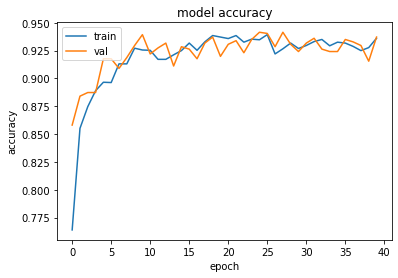

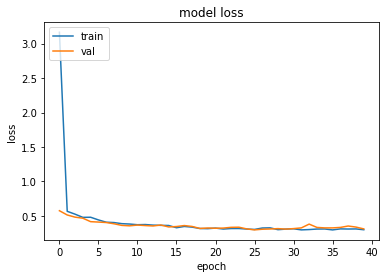

Test Accuracy: 0.9203463203463204
F1 score: 0.925686591276252


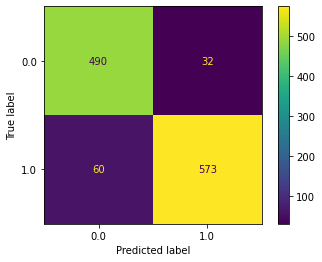

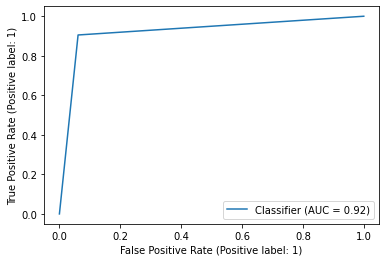

In [8]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.vgg16.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = True, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### VGG19

batch size: 64
learning rate: 0.001
epochs: 100
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool 

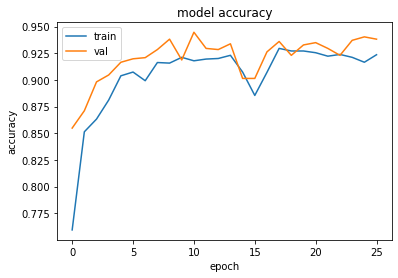

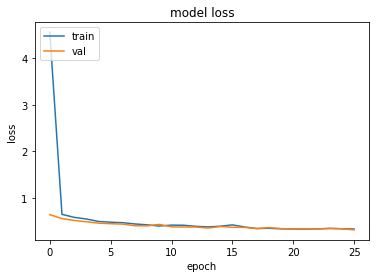

Test Accuracy: 0.9307359307359307
F1 score: 0.9352750809061487


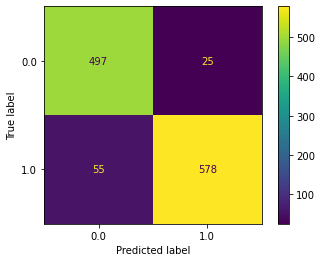

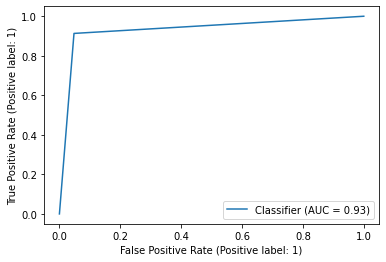

In [9]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.VGG19(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.vgg19.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = True, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### ResNet50V2

batch size: 64
learning rate: 0.001
epochs: 100
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

58/58 [==============================] - 208s 4s/step - loss: 0.4657 - accuracy: 0.8099 - val_loss: 0.4160 - val_accuracy: 0.8516
Epoch 21/100
58/58 [==============================] - 208s 4s/step - loss: 0.4689 - accuracy: 0.8151 - val_loss: 0.4056 - val_accuracy: 0.8581
Epoch 22/100
58/58 [==============================] - 210s 4s/step - loss: 0.4590 - accuracy: 0.8175 - val_loss: 0.4184 - val_accuracy: 0.8332
Epoch 23/100
58/58 [==============================] - 209s 4s/step - loss: 0.4574 - accuracy: 0.8145 - val_loss: 0.3902 - val_accuracy: 0.8808
Epoch 24/100
58/58 [==============================] - 210s 4s/step - loss: 0.4662 - accuracy: 0.8094 - val_loss: 0.3892 - val_accuracy: 0.8754
Epoch 25/100
58/58 [==============================] - 208s 4s/step - loss: 0.4720 - accuracy: 0.8034 - val_loss: 0.4071 - val_accuracy: 0.8581
Epoch 26/100
58/58 [==============================] - 208s 4s/step - loss: 0.4517 - accuracy: 0.8175 - val_loss: 0.4015 - val_accuracy: 0.8516
Epoch 27/100

58/58 [==============================] - 342s 6s/step - loss: 0.4007 - accuracy: 0.8465 - val_loss: 0.3463 - val_accuracy: 0.9014
Epoch 78/100
58/58 [==============================] - 328s 6s/step - loss: 0.3937 - accuracy: 0.8578 - val_loss: 0.3342 - val_accuracy: 0.9047
Epoch 79/100
58/58 [==============================] - 325s 6s/step - loss: 0.4040 - accuracy: 0.8497 - val_loss: 0.3448 - val_accuracy: 0.9003
Epoch 79: early stopping


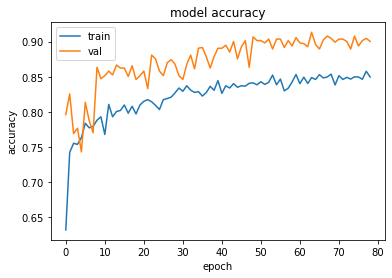

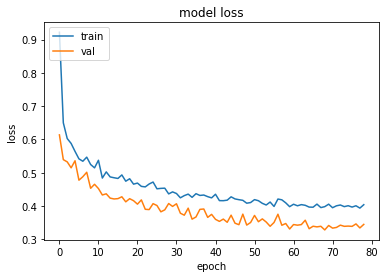

Test Accuracy: 0.896969696969697
F1 score: 0.8997472620050548


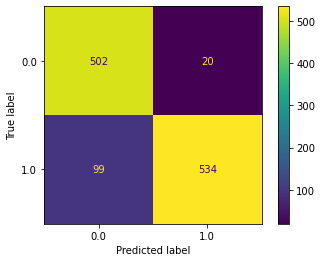

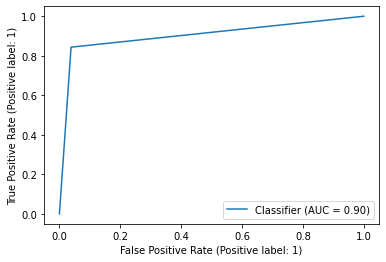

In [10]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.resnet_v2.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### InceptionResNetV2

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.inception_resnet_v2.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

batch size: 64
learning rate: 0.001
epochs: 100
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     

                                                                                                  
 batch_normalization_5 (BatchNo  (None, 25, 25, 96)  288         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

                                                                                                  
 activation_21 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_22 (Conv2D)             (None, 25, 25, 48)   13824       ['activation_21[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 25, 25, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 ormalization)                                                                                    
                                                                                                  
 activation_24 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_26 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
          

 batch_normalization_37 (BatchN  (None, 25, 25, 32)  96          ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_40 (BatchN  (None, 25, 25, 48)  144         ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_37 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 activation_40 (Activation)     (None, 25, 25, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36

                                                                                                  
 block35_6_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_42[0][0]',          
                                                                  'activation_44[0][0]',          
                                                                  'activation_47[0][0]']          
                                                                                                  
 block35_6_conv (Conv2D)        (None, 25, 25, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 25, 25, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6

                                                                                                  
 activation_58 (Activation)     (None, 25, 25, 48)   0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 conv2d_54 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_56 (Conv2D)             (None, 25, 25, 32)   9216        ['activation_55[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 25, 25, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 25, 25, 32)  96          ['conv2d_54[0][0]']              
 ormalizat

 block35_9 (Lambda)             (None, 25, 25, 320)  0           ['block35_8_ac[0][0]',           
                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 25, 25, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_69 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_69 (BatchN  (None, 25, 25, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 activation_75 (Activation)     (None, 12, 12, 384)  0           ['batch_normalization_75[0][0]'] 
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 12, 12, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 12, 12, 1088  0           ['activation_72[0][0]',          
                                )                                 'activation_75[0][0]',          
                                                                  'max_pooling2d_5[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 12, 12, 128)  139264      ['mixed_6a[0][0]']               
          

 block17_2 (Lambda)             (None, 12, 12, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 12, 12, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_85 (Conv2D)             (None, 12, 12, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_85 (BatchN  (None, 12, 12, 128)  384        ['conv2d_85[0][0]']              
 ormalization)                                                                                    
          

 block17_4_ac (Activation)      (None, 12, 12, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_93 (Conv2D)             (None, 12, 12, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_93 (BatchN  (None, 12, 12, 128)  384        ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_93 (Activation)     (None, 12, 12, 128)  0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 conv2d_94

 conv2d_101 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_6_ac[0][0]']           
                                                                                                  
 batch_normalization_101 (Batch  (None, 12, 12, 128)  384        ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_101 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_101[0][0]']
                                                                                                  
 conv2d_102 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_101[0][0]']         
                                                                                                  
 batch_normalization_102 (Batch  (None, 12, 12, 160)  480        ['conv2d_102[0][0]']             
 Normaliza

 Normalization)                                                                                   
                                                                                                  
 activation_109 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_109[0][0]']
                                                                                                  
 conv2d_110 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_109[0][0]']         
                                                                                                  
 batch_normalization_110 (Batch  (None, 12, 12, 160)  480        ['conv2d_110[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_110 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_110[0][0]']
          

                                                                                                  
 conv2d_118 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_117[0][0]']         
                                                                                                  
 batch_normalization_118 (Batch  (None, 12, 12, 160)  480        ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_118 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_118[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_11

 batch_normalization_126 (Batch  (None, 12, 12, 160)  480        ['conv2d_126[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_126 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_126[0][0]']
                                                                                                  
 conv2d_124 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_127 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_126[0][0]']         
                                                                                                  
 batch_normalization_124 (Batch  (None, 12, 12, 192)  576        ['conv2d_124[0][0]']             
 Normaliza

 activation_134 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_134[0][0]']
                                                                                                  
 conv2d_132 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_135 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_134[0][0]']         
                                                                                                  
 batch_normalization_132 (Batch  (None, 12, 12, 192)  576        ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_135 (Batch  (None, 12, 12, 192)  576        ['conv2d_135[0][0]']             
 Normaliza

                                                                                                  
 conv2d_143 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_142[0][0]']         
                                                                                                  
 batch_normalization_140 (Batch  (None, 12, 12, 192)  576        ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_143 (Batch  (None, 12, 12, 192)  576        ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_140 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_140[0][0]']
          

 batch_normalization_148 (Batch  (None, 12, 12, 192)  576        ['conv2d_148[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_151 (Batch  (None, 12, 12, 192)  576        ['conv2d_151[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 activation_151 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_151[0][0]']
                                                                                                  
 block17_1

                                                                                                  
 activation_156 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_156[0][0]']
                                                                                                  
 activation_158 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_158[0][0]']
                                                                                                  
 activation_161 (Activation)    (None, 12, 12, 288)  0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 5, 5, 384)    884736      ['activation_156[0][0]']         
                                                                                                  
 conv2d_159 (Conv2D)            (None, 5, 5, 288)    663552      ['activation_158[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_169 (Activation)    (None, 5, 5, 224)    0           ['batch_normalization_169[0][0]']
                                                                                                  
 conv2d_167 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_170 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_169[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 5, 5, 192)   576         ['conv2d_167[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_175 (Batch  (None, 5, 5, 192)   576         ['conv2d_175[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_178 (Batch  (None, 5, 5, 256)   768         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_175 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_178 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_178[0][0]']
          

 activation_183 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_183[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 5, 5, 448)    0           ['activation_183[0][0]',         
                                                                  'activation_186[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 5, 5, 2080)   0           ['block8_5_ac[0][0]',            
          

 block8_8_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_8_mixed[0][0]']         
                                                                                                  
 block8_8 (Lambda)              (None, 5, 5, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 5, 5, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_196 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_196 (Batch  (None, 5, 5, 192)   576         ['conv2d_196[0][0]']             
 Normaliza

 conv_7b_bn (BatchNormalization  (None, 5, 5, 1536)  4608        ['conv_7b[0][0]']                
 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 5, 5, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 GlobalAveragePooling2D (Global  (None, 1536)        0           ['conv_7b_ac[0][0]']             
 AveragePooling2D)                                                                                
                                                                                                  
 dropout_6 (Dropout)            (None, 1536)         0           ['GlobalAveragePooling2D[0][0]'] 
                                                                                                  
 fc1 (Dens

58/58 [==============================] - 598s 10s/step - loss: 0.4373 - accuracy: 0.8248 - val_loss: 0.3825 - val_accuracy: 0.8678
Epoch 46/100
58/58 [==============================] - 600s 10s/step - loss: 0.4406 - accuracy: 0.8278 - val_loss: 0.3973 - val_accuracy: 0.8624
Epoch 47/100
58/58 [==============================] - 611s 11s/step - loss: 0.4405 - accuracy: 0.8253 - val_loss: 0.3931 - val_accuracy: 0.8624
Epoch 48/100
58/58 [==============================] - 618s 11s/step - loss: 0.4440 - accuracy: 0.8251 - val_loss: 0.3974 - val_accuracy: 0.8440
Epoch 49/100
58/58 [==============================] - 619s 11s/step - loss: 0.4430 - accuracy: 0.8256 - val_loss: 0.3979 - val_accuracy: 0.8581
Epoch 50/100
58/58 [==============================] - 618s 11s/step - loss: 0.4514 - accuracy: 0.8205 - val_loss: 0.4157 - val_accuracy: 0.8429
Epoch 51/100
58/58 [==============================] - 624s 11s/step - loss: 0.4353 - accuracy: 0.8294 - val_loss: 0.3942 - val_accuracy: 0.8548
Epoch

### MobileNetV2

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.MobileNetV2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.mobilenet_v2.preprocess_input

model_runner.run(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### DenseNet169

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.DenseNet169(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.densenet.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### EfficientNetB2

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.EfficientNetB2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.efficientnet.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### Xception

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.Xception(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.xception.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### NASNetMobile

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.nasnet.NASNetMobile(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.nasnet.preprocess_input

model_runner.run(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)